In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from funciones import *

In [3]:
data = pd.read_csv('train.csv')
data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


#### Veamos nombres de nuestras variables, nulos y duplicados

In [4]:
'''No tenemos nulos'''
data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [5]:
'''Tenemos 38 columnas, 37 numericas y 1 categorica, que es nuestro target
Estas son variables numericas continuas (según Kaggle):

'Previous qualification (grade)'
'Admission grade' 
'Unemployment rate'
'Inflation rate'
'GDP' 

Por lo que el resto las vamos a meter en data_cat'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [6]:
data_num = data[['Previous qualification (grade)','Admission grade','Unemployment rate','Inflation rate',
'GDP', 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']]
data_cat = data.drop(data_num, axis=1)

In [7]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              76518 non-null  int64 
 1   Marital status                                  76518 non-null  int64 
 2   Application mode                                76518 non-null  int64 
 3   Application order                               76518 non-null  int64 
 4   Course                                          76518 non-null  int64 
 5   Daytime/evening attendance                      76518 non-null  int64 
 6   Previous qualification                          76518 non-null  int64 
 7   Nacionality                                     76518 non-null  int64 
 8   Mother's qualification                          76518 non-null  int64 
 9   Father's qualification                          76

In [8]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Previous qualification (grade)    76518 non-null  float64
 1   Admission grade                   76518 non-null  float64
 2   Unemployment rate                 76518 non-null  float64
 3   Inflation rate                    76518 non-null  float64
 4   GDP                               76518 non-null  float64
 5   Curricular units 1st sem (grade)  76518 non-null  float64
 6   Curricular units 2nd sem (grade)  76518 non-null  float64
dtypes: float64(7)
memory usage: 4.1 MB


In [9]:
'''Aquí vemos los % de valores que cada categoría presenta en la columna target
Hay más graduados que no graduados, pero no es un desbalanceo muy grande'''
data_cat.Target.value_counts()*100/len(data_cat) 

Target
Graduate    47.416294
Dropout     33.058888
Enrolled    19.524818
Name: count, dtype: float64

In [10]:
'''Con esto vemos que en todas las categorias de target, la nacionalidad que más representación tiene es la 1, 
o sea la Portuguesa. Por lo que podríamos prescindir de la variable International'''


import matplotlib.pyplot as plt

# Calculate the percentages
percentages = data_cat.groupby('Target')['Nacionality'].value_counts() * 100 / len(data_cat)

'''# Plot the graph
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.title('Percentage of Nacionality by Target')
plt.show()'''

print(data_cat.groupby('Target')['Nacionality'].value_counts()*100/len(data_cat))

Target    Nacionality
Dropout   1              32.835411
          41              0.124154
          6               0.028751
          22              0.019603
          26              0.015683
          101             0.007841
          21              0.005228
          100             0.005228
          25              0.005228
          105             0.003921
          32              0.001307
          11              0.001307
          62              0.001307
          103             0.001307
          24              0.001307
          17              0.001307
Enrolled  1              19.404585
          41              0.043127
          26              0.024831
          6               0.018296
          22              0.007841
          105             0.003921
          103             0.003921
          62              0.003921
          24              0.003921
          100             0.002614
          21              0.002614
          101             0.00261

#### Vamos a ocuparnos de las variables categoricas, que son más. Vamos a conseguir sus dummies.

In [11]:
data_cat = data_cat.astype(str)
data_cat2 = data_cat.copy()
data_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              76518 non-null  object
 1   Marital status                                  76518 non-null  object
 2   Application mode                                76518 non-null  object
 3   Application order                               76518 non-null  object
 4   Course                                          76518 non-null  object
 5   Daytime/evening attendance                      76518 non-null  object
 6   Previous qualification                          76518 non-null  object
 7   Nacionality                                     76518 non-null  object
 8   Mother's qualification                          76518 non-null  object
 9   Father's qualification                          76

In [12]:
data_cat = data_cat.astype(str)
data_cat2 = data_cat.copy()
data_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              76518 non-null  object
 1   Marital status                                  76518 non-null  object
 2   Application mode                                76518 non-null  object
 3   Application order                               76518 non-null  object
 4   Course                                          76518 non-null  object
 5   Daytime/evening attendance                      76518 non-null  object
 6   Previous qualification                          76518 non-null  object
 7   Nacionality                                     76518 non-null  object
 8   Mother's qualification                          76518 non-null  object
 9   Father's qualification                          76

In [13]:
data_cat = data_cat.drop(['id','International','Target'],axis=1)
data_cat

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
0,1,1,1,9238,1,1,1,1,19,5,...,0,6,6,6,0,0,6,7,6,0
1,1,17,1,9238,1,1,1,19,19,9,...,0,6,8,4,0,0,6,9,0,0
2,1,17,2,9254,1,1,1,3,19,2,...,0,6,0,0,0,0,6,0,0,0
3,1,1,3,9500,1,1,1,19,3,3,...,0,7,9,7,0,0,8,11,7,0
4,1,1,2,9500,1,1,1,19,37,4,...,0,7,12,6,0,0,7,12,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,1,19,1,7,...,0,6,9,6,0,0,6,8,5,0
76514,1,1,6,9254,1,1,1,1,38,4,...,0,6,22,4,0,0,6,9,6,0
76515,5,17,1,9085,1,1,1,37,37,9,...,0,5,13,4,2,0,5,8,5,1
76516,1,1,3,9070,1,1,1,38,37,5,...,0,6,0,0,0,0,6,0,0,0


In [14]:

from sklearn.preprocessing import OneHotEncoder

X = data_cat
y = data_cat2['Target']
 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

hot_enc = OneHotEncoder(sparse_output=False, #por defecto el formato el formato es sparse
                               drop='first', # no creamos una nueva columna con la primera categoria que encuentra
                               handle_unknown='ignore') # ignora nuevas categorias en el test

hot_enc.fit(X_train)
# aqui podriamos poner más columnas y lo trataría como un get_dummies
# este objeto recordará las diferentes categorías de cada columna
# cuando se aplique a otro dataset (test o submission) dataset creara el mismo numero de columnas
hot_enc.transform(X_train)
columnas = hot_enc.get_feature_names_out()
columnas.shape

(503,)

In [15]:
len(columnas)
hot_enc.transform(X_train).shape

(57388, 503)

In [16]:
X_test.shape

(19130, 28)

In [17]:
X_train[columnas] = hot_enc.transform(X_train)


In [18]:
X_train = X_train.drop(columns=data_cat.columns,axis=1)


In [19]:
X_train.shape

(57388, 503)

In [20]:
hot_enc.transform(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
hot_enc.transform(X_test).shape

(19130, 503)

In [22]:

columnas_test = hot_enc.get_feature_names_out()
X_test[columnas_test] = hot_enc.transform(X_test)
X_test = X_test.drop(columns=data_cat.columns,axis=1)

In [23]:
columnas_test.shape

(503,)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

clf_grad = LogisticRegression()

clf_grad.fit(X_train,y_train)

#Predicciones test
yhat = clf_grad.predict(X_test) # --> aquí predigo la categoría
y_probs = clf_grad.predict_proba(X_test) # --> aquí saca las probabilidades de sacar cada variable. Nos interesan los graduados (1)

#Predicciones train
yhat_train=clf_grad.predict(X_train)
y_probs_train=clf_grad.predict_proba(X_train)

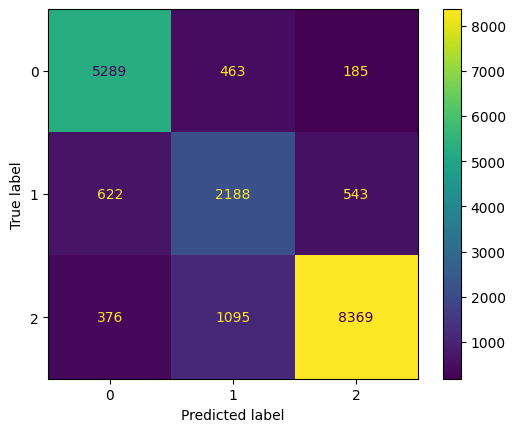

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(yhat, y_test)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

##### Veamos las scores...como es de clasificación, vamos a evaluarlo con accuracy y curva ROC

In [26]:
#Accuracy del test: comparamos la y_test original con la yhat predicha con X_test
acc = accuracy_score(y_test, yhat)
print('Test accuracy:',acc)
#Accuracy del train: comparamos la y_train original con la yhat predicha con X_train
acc_train = accuracy_score(y_train, yhat_train)
print('Train accuracy:', acc_train)

Test accuracy: 0.8283324621014114
Train accuracy: 0.8280302502265282


In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_test = roc_auc_score(y_test,y_probs,multi_class='ovr')
print("Test AUC:", roc_auc_test)

roc_auc_train = roc_auc_score(y_train,y_probs_train,multi_class='ovr')
print("Train AUC:", roc_auc_train)

Test AUC: 0.9305633025329193
Train AUC: 0.9308852175527597


##### Elegimos LogisticRegression como modelo para hacer la submission en Kaggle

In [28]:
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")
test

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [29]:
test = test.drop(['id','International','Previous qualification (grade)','Admission grade','Unemployment rate','Inflation rate',
'GDP', 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'],axis=1)

In [30]:
test.shape

(51012, 28)

In [31]:
test = test.astype(str)

In [32]:
hot_enc.transform(test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
columnas_sub = hot_enc.get_feature_names_out()
test[columnas_sub] = hot_enc.transform(test)
test = test.drop(columns=data_cat.columns,axis=1)

In [34]:
test.columns.shape

(503,)

In [35]:
yhat_submission = clf_grad.predict(test)

In [36]:
yhat_submission

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [37]:
submission.Target = yhat_submission
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [38]:
submission.to_csv("submission.csv",index=False)

In [39]:
data_cat2.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,0,1,1,1,9238,1,1,1,1,19,...,6,6,6,0,0,6,7,6,0,Graduate
1,1,1,17,1,9238,1,1,1,19,19,...,6,8,4,0,0,6,9,0,0,Dropout
2,2,1,17,2,9254,1,1,1,3,19,...,6,0,0,0,0,6,0,0,0,Dropout
3,3,1,1,3,9500,1,1,1,19,3,...,7,9,7,0,0,8,11,7,0,Enrolled
4,4,1,1,2,9500,1,1,1,19,37,...,7,12,6,0,0,7,12,6,0,Graduate
